# # PROJECT 5: HOUSES PRICES PREDICTION IN BCN MACHINE LEARNING MODEL

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r'C:\Users\Migue Granica\Desktop\IronHack\Modulo_3\PROJECT_5\csv\house_prices.csv')
#df = pd.read_csv(r'C:\Users\Migue Granica\Desktop\IronHack\Modulo_3\PROJECT_5\csv\house_prices_clean.csv')

In [ ]:
df.filter()

In [134]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'district', 'room_n', 'bath_n',
       'renovated', 'sqm_constr', 'price', 'sqm_price'],
      dtype='object')

## Recording the SQM mean price

    the publics registres can show us the mean price for each district in termes of the all polutation, this values can be use to elavorate a more precise predictor scalable in more a versatile way. Let's use the last semestre registre's.

In [135]:
df_val  = pd.read_excel(r'C:\Users\Migue Granica\Desktop\IronHack\Modulo_3\PROJECT_5\xls\m2_x_año_3.xlsx')

In [136]:
df_val.loc[df_val['año']==2019][['distrito','valor_m2']]

,distrito,valor_m2
121,BARCELONA,4115
122,1. Ciutat Vella,4320
123,2. Eixample,4632
124,3. Sants-Montjuïc,3539
125,4. Les Corts,4763
126,5. Sarrià-Sant Gervasi,5362
127,6. Gràcia,4217
128,7. Horta-Guinardó,3080
129,8. Nou Barris,2591
130,9. Sant Andreu,3261


In [137]:
dict_sqm_values = {'Sarria-Sant_Gervasi':5362,'Eixample':4632,'Gràcia':4217,
              'Les Corts':4763, 'Sant Marti':3791,'Ciutat Vella':4320,
              'Sants Montjuic':3539,'Horta Guinardó':3080}

def get_sqm_val(neigh): 
    for key, value in dict_sqm_values.items():
        if neigh == key:
            return value 

In [138]:
df['sqm_price']=df.district.apply(lambda x: get_sqm_val(x))

In [139]:
df.dropna(inplace=True)

## LINEAR REGRESSION

LR is a way to of predictiong a response Y on the basis of a single predictor variable X. It is assumed that there is approximately a linear relationship between X and Y. 

Mathematically, it can be represented by:
    
    
    Y ≈ ɒ + ß X + ℇ

In [146]:
df_1 = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','district','renovated'])

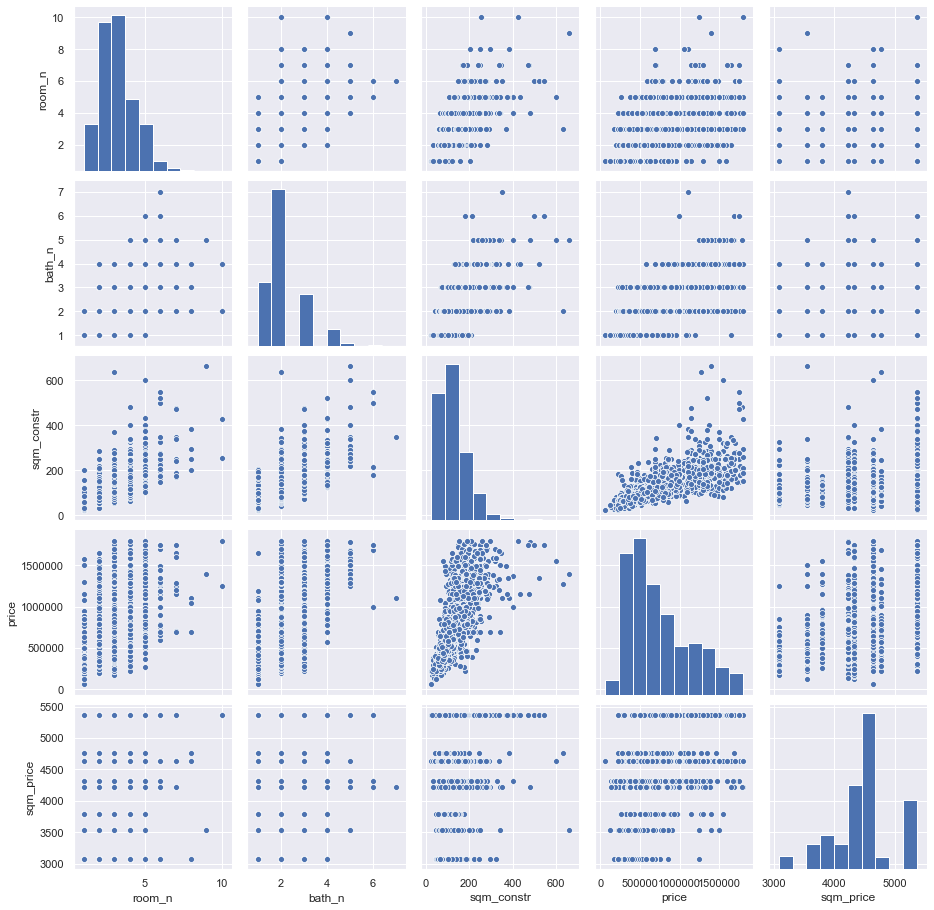

In [140]:
sns.set(style="darkgrid")
sns.pairplot(df_1)

the pairplot use two basic figures, the histogram and the scatterplot.
    -histogram: allow us to see the distribution of a single variable
    -Scatterplot: shows realtionships between two variables.

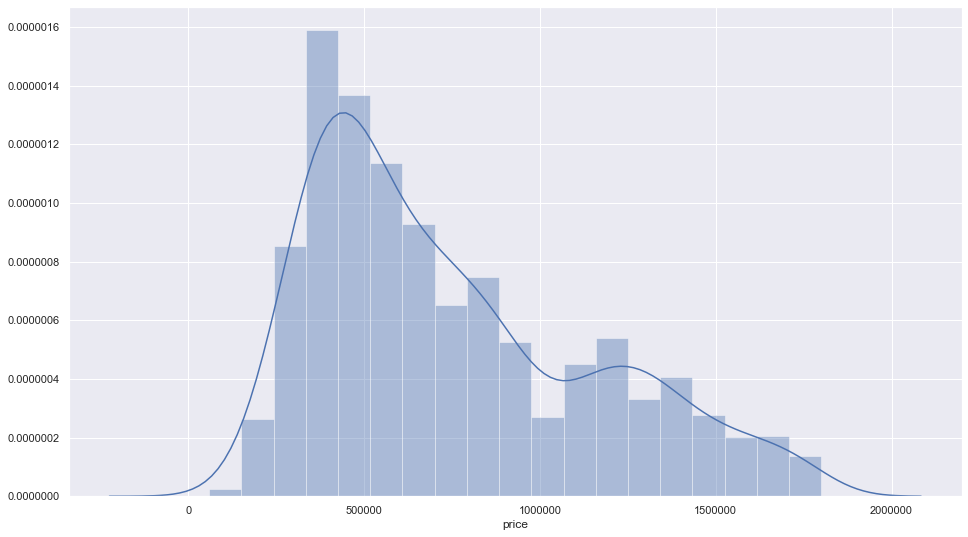

In [141]:
plt.figure(figsize=(16,9))
sns.distplot(df_1['price'])

## CORELATION

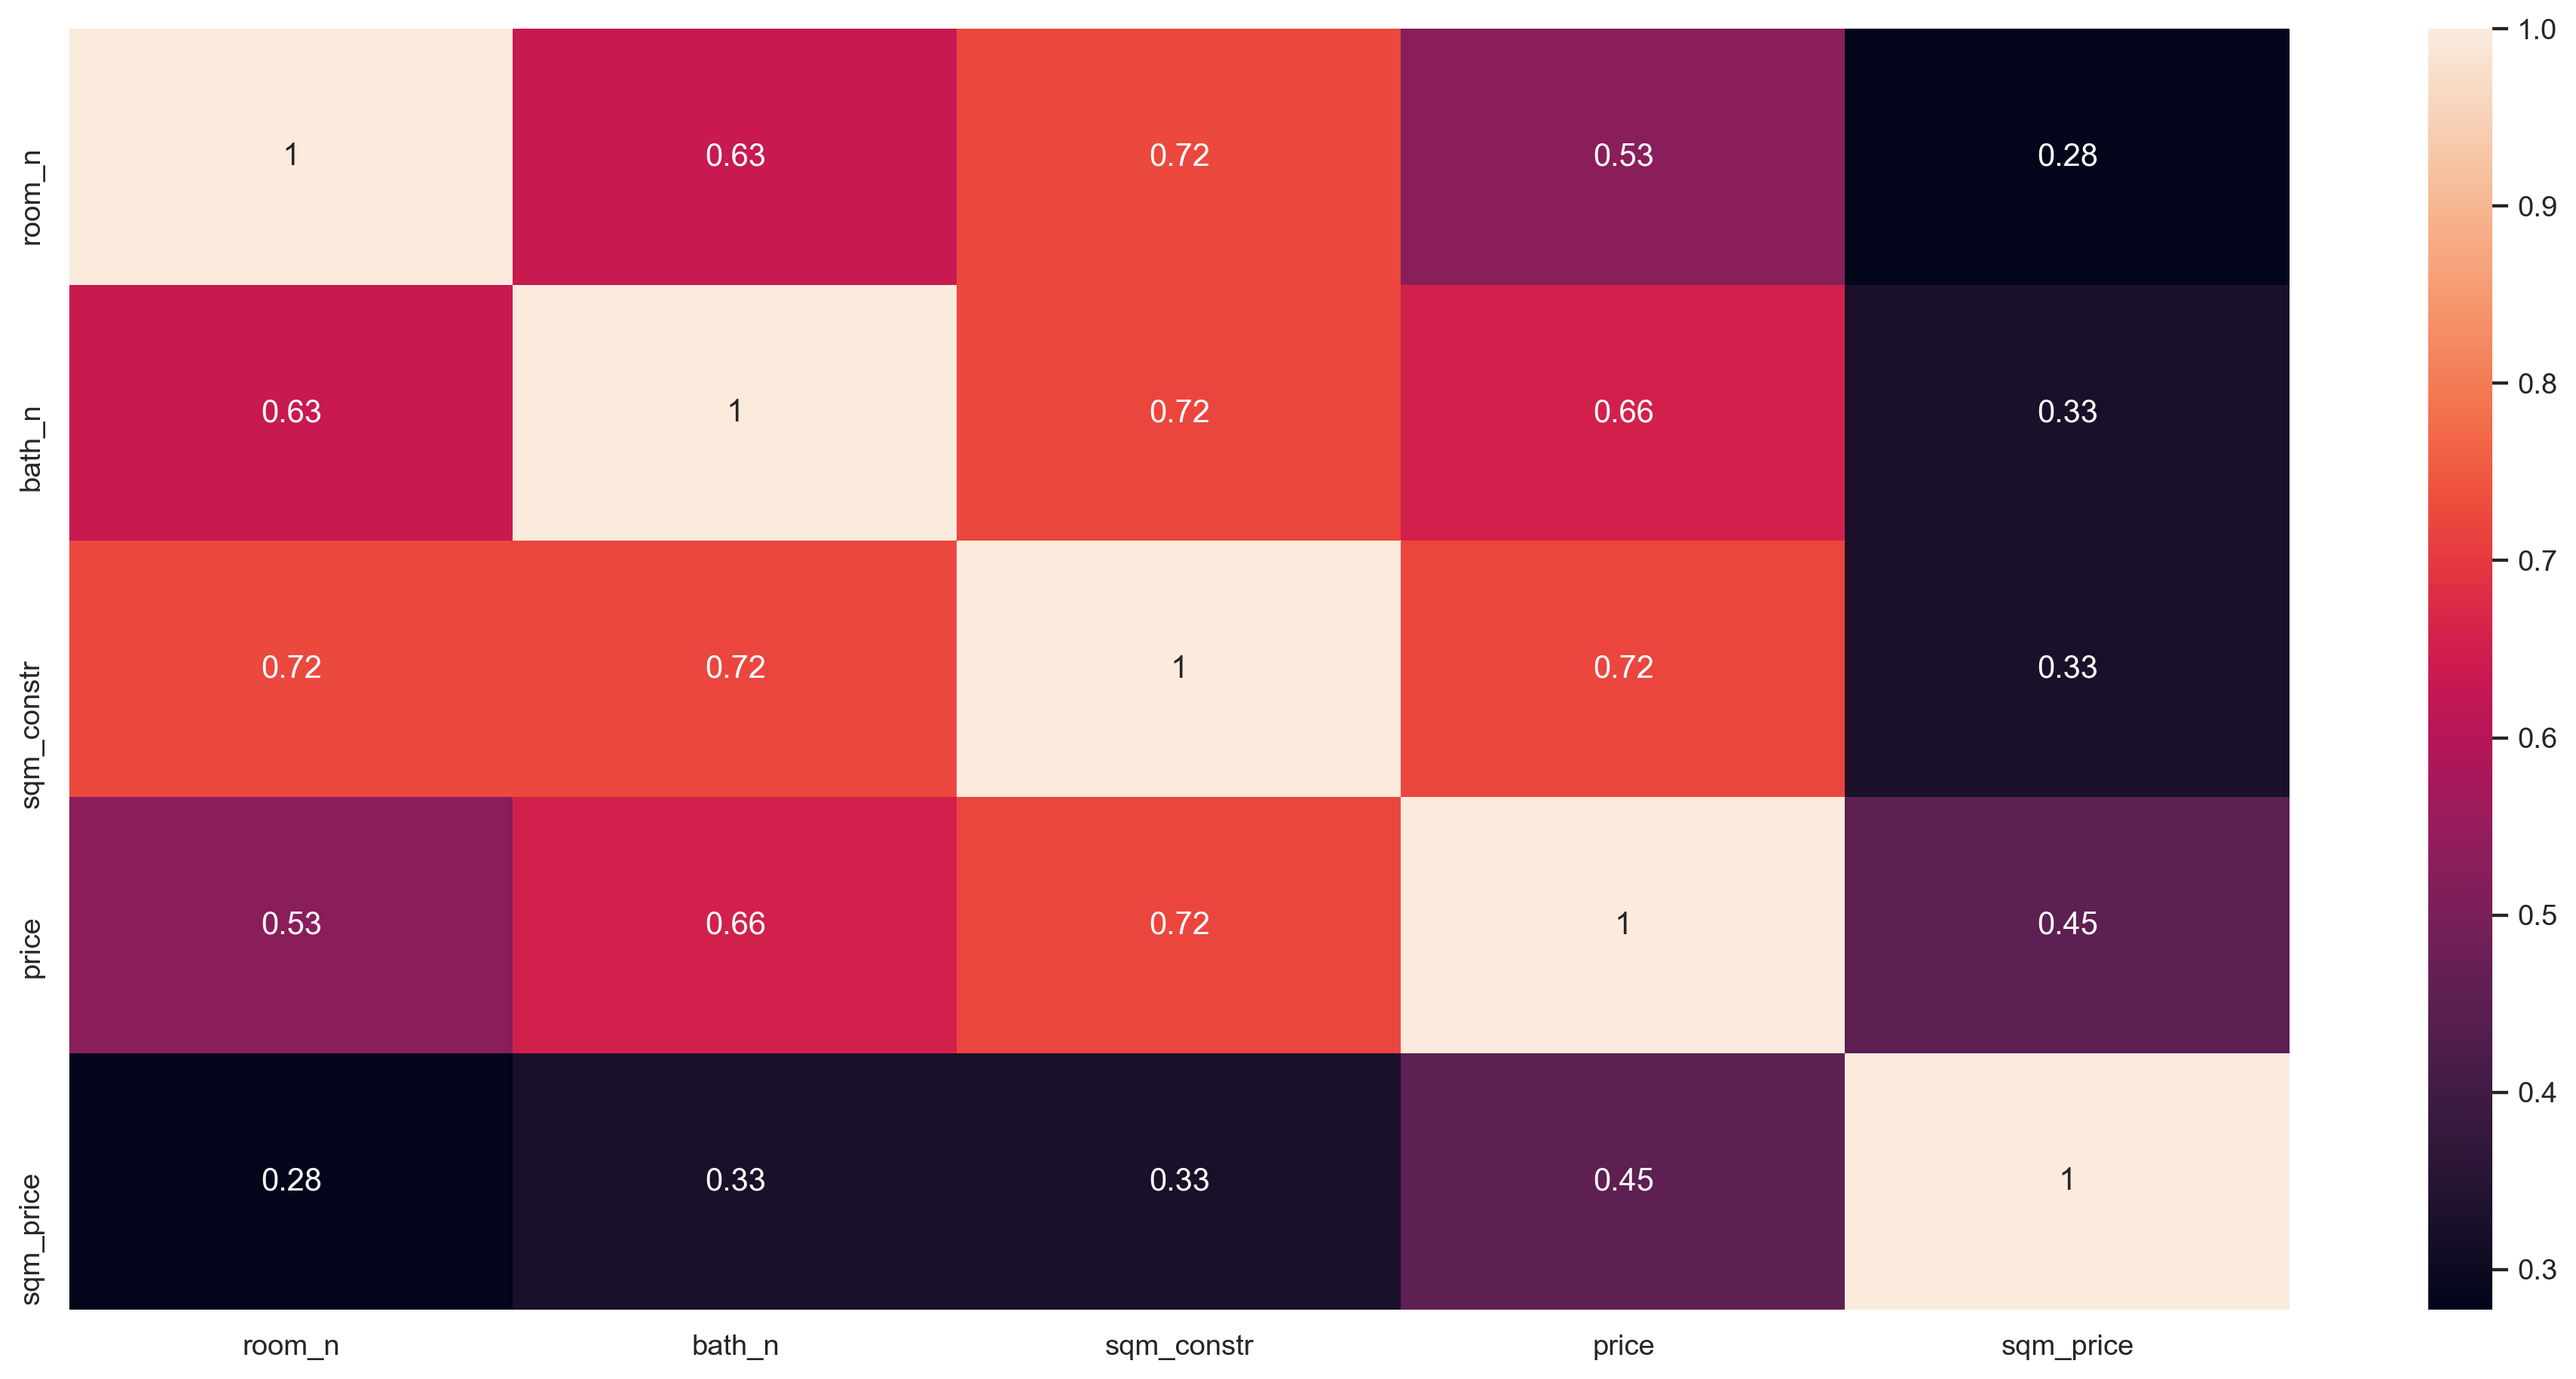

In [142]:
plt.figure(figsize=(19,9), dpi=250)
sns.heatmap(df_1.corr(), annot=True)

In [143]:
dummies = pd.get_dummies(df.district)

In [144]:
dummies.head()

,Ciutat Vella,Eixample,Gràcia,Horta Guinardó,Les Corts,Sant Marti,Sants Montjuic,Sarria-Sant_Gervasi
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [145]:
dummies.drop(columns='none',inplace=True)

KeyError: "['none'] not found in axis"

In [147]:
df_2 = pd.concat([df_1,dummies],axis='columns')

In [148]:
df_2.head()

,room_n,bath_n,sqm_constr,price,sqm_price,Ciutat Vella,Eixample,Gràcia,Horta Guinardó,Les Corts,Sant Marti,Sants Montjuic,Sarria-Sant_Gervasi
0,2.00,2.00,61.00,440000.00,4320.00,1,0,0,0,0,0,0,0
1,3.00,2.00,134.00,880000.00,4320.00,1,0,0,0,0,0,0,0
2,2.00,2.00,129.00,840000.00,4320.00,1,0,0,0,0,0,0,0
3,2.00,2.00,93.00,720000.00,4320.00,1,0,0,0,0,0,0,0
4,1.00,2.00,65.00,400000.00,4320.00,1,0,0,0,0,0,0,0


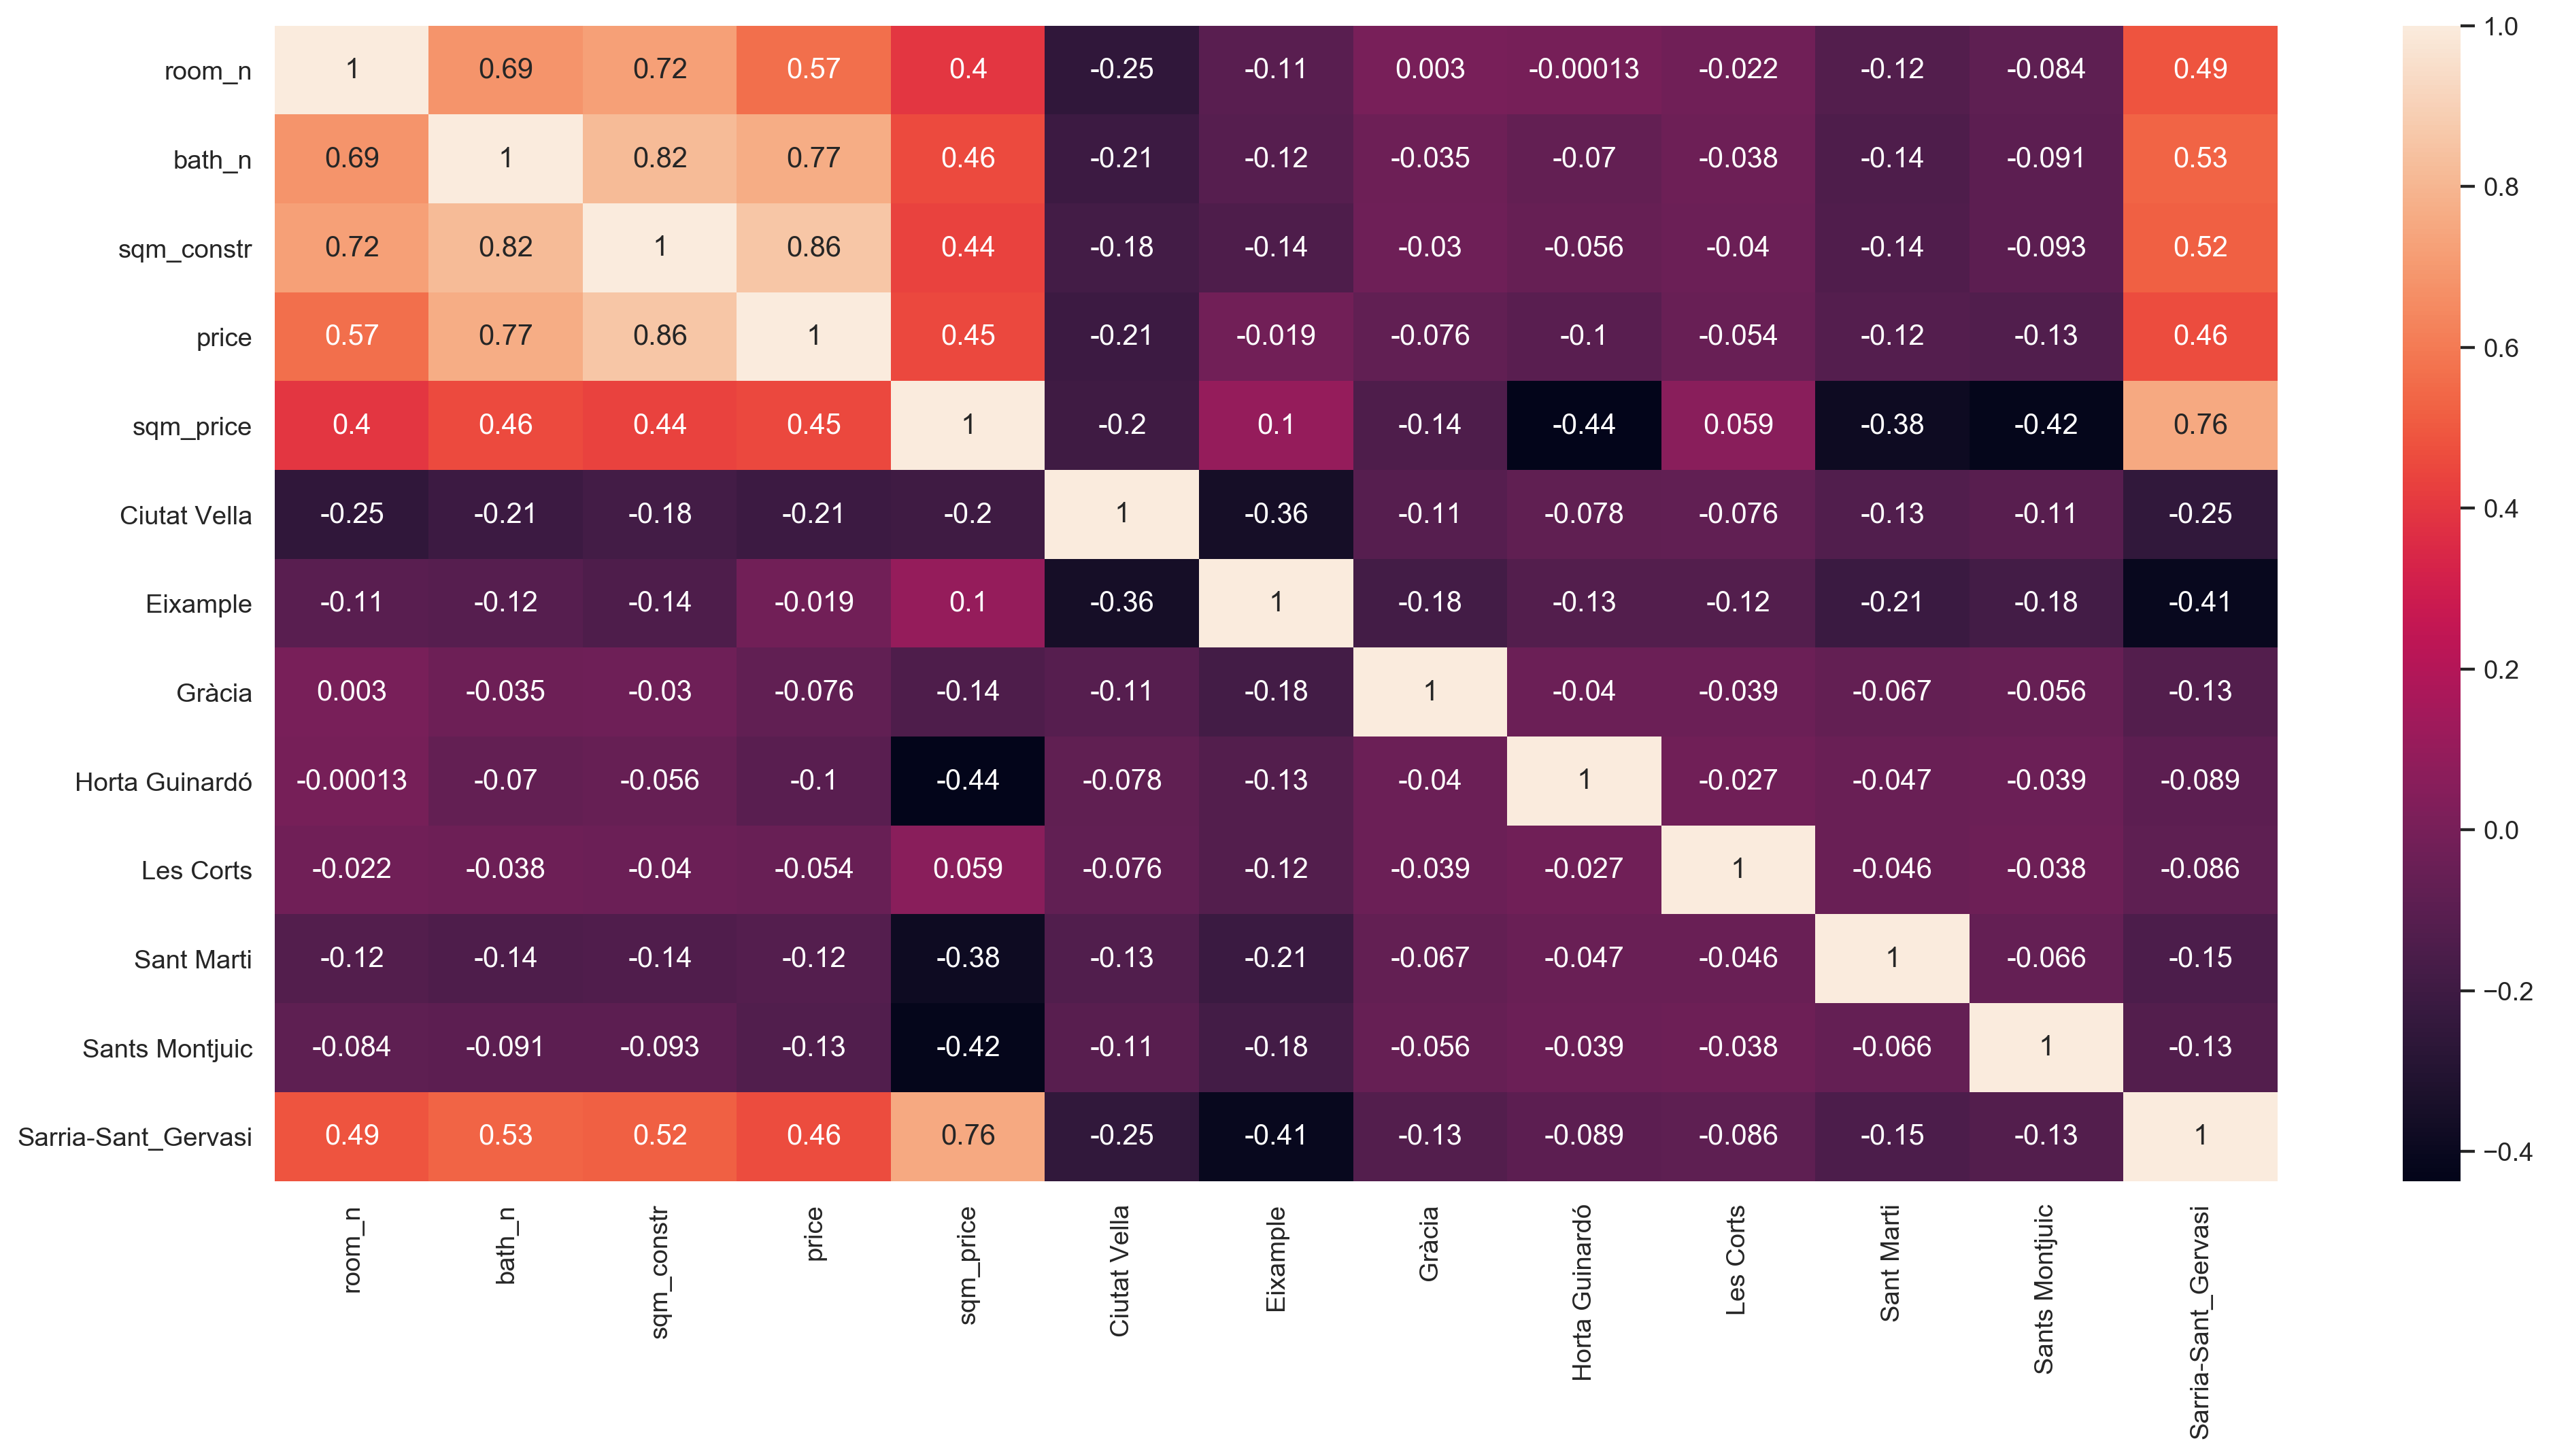

In [149]:
plt.figure(figsize=(19,9), dpi=250)
sns.heatmap(df_2.corr(), annot=True)

## 2 Training a Linear Regression Model

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor

### 2.1 Train Test Split 

Our goal is to create a model that generalises well to the new data. 
by dividing the data in train and test we we are abble to use the test sample to chech the accuracy of the model built by the train data.

first, we have to split up our data into X array that contains the features and y array with the target variable,the 'price' in this case. the categorical features have been replaced by a hot encoding that represents each one of the districts.

In [151]:
y = df_2['price']
X = df_2.drop(columns='price')

In [152]:
X.isna().sum()

room_n                 0
bath_n                 0
sqm_constr             0
sqm_price              0
Ciutat Vella           0
Eixample               0
Gràcia                 0
Horta Guinardó         0
Les Corts              0
Sant Marti             0
Sants Montjuic         0
Sarria-Sant_Gervasi    0
dtype: int64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [154]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regresion':{
            'model':LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_ese'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190621281470425.2, tolerance: 170402628373.25903
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193365287181056.9, tolerance: 177561745138.21558
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176800022238476.53, tolerance: 155657903723.62692
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: Convergen

c:\program files\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'friedman_ese'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\program files\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'friedman_ese'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\program files\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'friedman_ese'

  warnings.warn("Estimator fit failed. The score on this train-test"


,model,best_score,best_params
0,linear_regresion,0.74,{'normalize': True}
1,lasso,0.74,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.62,"{'criterion': 'mse', 'splitter': 'best'}"


### 2.2Linear Regression Model

In [155]:
clf = LinearRegression()
clf.fit(X_train,y_train)
#clf.score(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
y_pred = clf.predict(X_test)

#### The final step is to evaluate the performance of the algorithm.

        - compare y_test and y_pred

In [158]:
pd.options.display.float_format = '{:.2f}'.format
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comp

,Actual,Predicted
1292,395000.00,449607.88
1310,8450000.00,4187880.14
960,499000.00,652795.78
107,175000.00,131790.56
1560,995000.00,1387269.33
...,...,...
1808,299000.00,331154.16
1389,4600000.00,4288598.78
1026,595000.00,677091.08
578,745000.00,1009664.18


In [170]:
df_comp_1 = df_comp.sample(20)


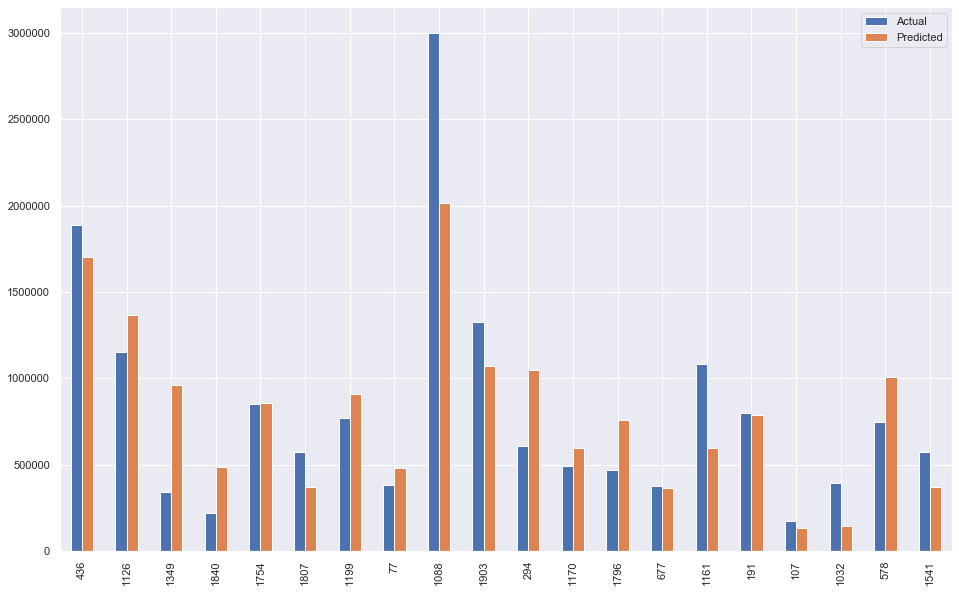

In [171]:
df_comp_1.plot(kind='bar',figsize=(16,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

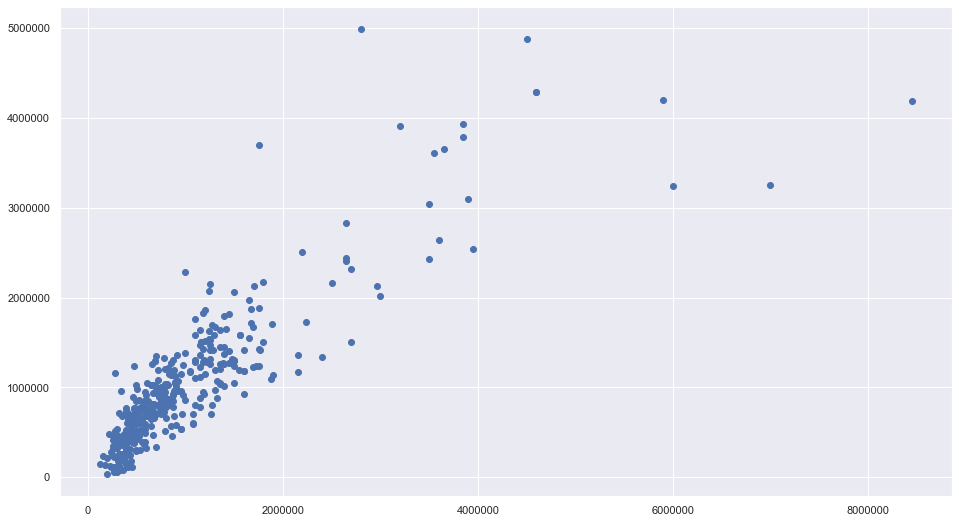

In [169]:
plt.figure(figsize=(16,9))
plt.scatter(y_test,y_pred)

    - Mean absolute Error (MAE): is the mean of the absolute value of the errors. 

<img src="png\funciones\mea.png">

    - Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

<img src="png\funciones\mse.png">

      - Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

<img src="png\funciones\rmse.png">

In [163]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 268542.80732494843
Mean Squared Error: 228308236510.60318
Root Mean Squared Error: 477816.11160634086


In [164]:
def performance_metric(y_true, y_predict):
    result = r2_score(y_true, y_predict)
    
    # R2 score closer to 1 is a good model
    print(f"R2 score: {r2_score(y_true, y_predict)}")
    
    return result

In [165]:
performance_metric(y_test, y_pred)

R2 score: 0.7518707027894216


0.7518707027894216

-1–0.8 → Very strong
-0.799–0.6 → Strong
-0.599–0.4 → Moderate
-0.399–0.2 → Weak
-0.199–0 → Very Weak

### 2.3 Cross Validation Evaluation

Cross Validation is a technique for asseissing how the statistical analysis genralises to an independent data set. It is a technique for evaluationg machine learninf models by traning several models on subsets of the available input data and evaluationf them on the complementary subset of the data. Usianf cross-validatio, there are high chances taht we can detect over-fitting with ease

#### K-Fold Cross Validation
never mix train and test data.
the first step is alway to isolate the test data set and use it only for the final evaluation. CV will thus be performed on the traning set.

<img src="png\cross_val.png">

In [166]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X, y, cv=15))

[-0.77094266  0.68630228  0.59598352  0.61255134  0.60251177  0.90393147
  0.84720328  0.62696881  0.72659641  0.71527293  0.74056173  0.73540938
  0.73500099  0.71162101  0.81858214]


### 2.4Multiple Linear Regression

<img src="png\mlr.png">

in the case of multivariable linear regression, the model has to find the most optimal coefficients for al the attributes. For that we can check what coefficients our regression model has chosen

In [92]:
coeff_df = pd.DataFrame(clf.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
room_n,-25485.06
bath_n,117425.20
sqm_constr,3114.08
sqm_price,137.18
Ciutat Vella,-30651.58
Eixample,113681.24
Gràcia,-35209.96
Horta Guinardó,-21711.34
Les Corts,-96433.71
Sant Marti,81753.87


In [118]:
df_mlr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_mlr.head(25)

,Actual,Predicted
1615,790000.00,705892.99
1270,750000.00,735034.16
1515,199000.00,257858.34
161,650000.00,971131.43
520,1180000.00,820020.13
1145,1100000.00,1043616.86
898,780000.00,681287.17
944,325000.00,489284.80
80,498000.00,494190.86
434,1350000.00,1316510.57


In [137]:
testing_df = pd.DataFrame([4,  2,  1, 120, 6000,
      1, 0, 0, 0,0,0, 0, 0])
testing_df

,0
0,4
1,2
2,1
3,120
4,6000
5,1
6,0
7,0
8,0
9,0


### Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor
max_depth = [2, 4, 6, 8, 10]
score_train = []
score_test  = []
for i in max_depth:
    regr = RandomForestRegressor(max_depth=i)
    result = regr.fit(X_train, y_train)
    y_pred_train = result.predict(X_train)
    y_pred_test = result.predict(X_test)
    r2_score_training = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print(f'rand_forest {i} training score = {r2_score_training} Vs. test score = {r2_score_test}')
    score_train.append(r2_score_training)
    score_test.append(r2_score_test)

rand_forest 2 training score = 0.607196464490985 Vs. test score = 0.5979913112680577
rand_forest 4 training score = 0.6903539459005568 Vs. test score = 0.6645307511117511
rand_forest 6 training score = 0.7541148094846608 Vs. test score = 0.6898279801924001
rand_forest 8 training score = 0.8138395415734825 Vs. test score = 0.6758619123127446
rand_forest 10 training score = 0.8613174641184682 Vs. test score = 0.6634076693866454


Text(0, 0.5, 'r2 score')

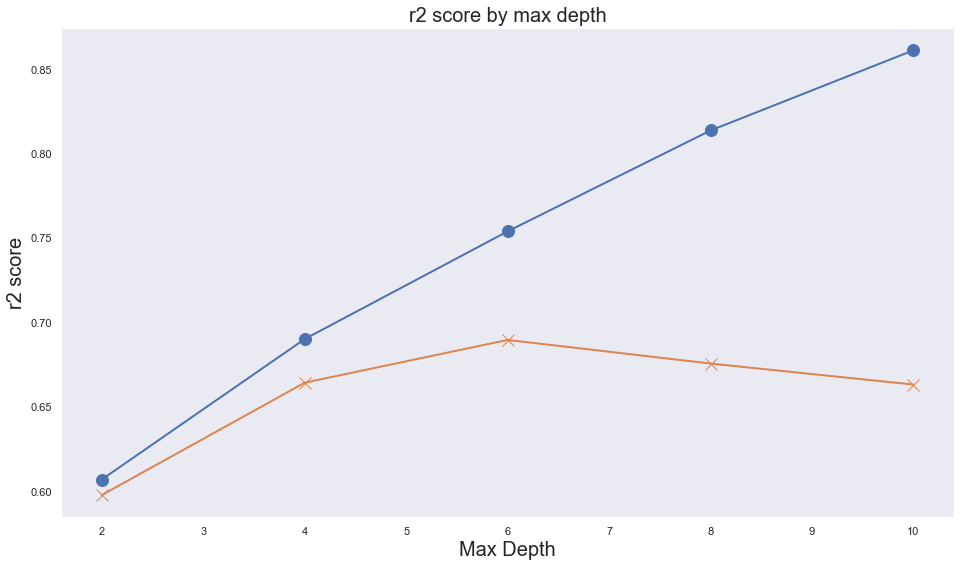

In [120]:
plt.figure(figsize=(16,9))
plt.grid()
plt.title('r2 score by max depth', size=20)
plt.plot(max_depth, score_train, label='score train', marker='o', linewidth=2, markersize=12)
plt.plot(max_depth, score_test, label='score test',marker='x', linewidth=2, markersize=12)
plt.xlabel('Max Depth', size=20)
plt.ylabel('r2 score', size=20)

##  3HOUSE PREDICTOR WITH DEEP LEARNING

    -this model has the objective of predict if a house will be above the median price or not based off of its features using deep learning

### 3.1 IMPORT LIBRARIES

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMAxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "c:\program files\python38\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\program files\python38\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\program files\python38\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "c:\program files\python38\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "c:\program files\python38\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: No se puede encontrar el módulo especificado.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.